In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset:
df_train = pd.read_csv('bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test = pd.read_csv('bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
# Let's check the missing values in train data set:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation: 
### Here we can see that there are missing values in the columns: "Item_Weight", "Outlet_Size".

In [5]:
# Let's check the missing values in test data set:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Observation: 
### Here we can see that there are missing values in the columns: "Item_Weight", "Outlet_Size" which is same in both train and test data.

# data Information:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Observation: 
### Here we can see that few columns are int,few are float and other few are object types but the columns which are with missing values ie. "Item_Weight", "Outlet_Size" are of float and object types

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Observation:
### Here we can see that few columns are int,few are float and other few are object types but the columns which are with missing values ie., "Item_Weight", "Outlet_Size" are of float and object types

# Statistical information of the data:

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Observation:
### Here we get the numerical data information statistics an there we can see that in the column "Item Weight" there are some rows which are missing and can be handled with the "mean" of that column values, which is given as "12.85" and also in test data we fill null values with its column mean.

In [9]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Observation:
### Here we get the numerical data information statistics an dhere we can see that in the column "Item Weight" there are rows missing and can be handled with the "mean" of that column values, which is given as "12.85" and also in test data we fill null values with its column mean.

# Step - 1 : Data preparation:

# Filling the null values:

In [10]:
# Here we fill null values for both train and test in the column "Item weight".
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace = True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace = True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Observation: 
### Here we can see that in both train and test data the column "Item_Weight" is filled and there are no null values in it now.

In [13]:
df_train["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [14]:
df_test["Outlet_Size"]

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

### Observation: 
### Here we can see that this column "Outlet_Size" is a categorical column. So we'll fill null values with the help of mode value of that column in both the data

In [15]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Here now we will fill null values in the column "Outlet_Size" with mode and in that with the "medium" value and whose index is "0".

In [16]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace = True)
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0],inplace = True)

In [17]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Observation: 
### Here we can see that in both train and test we can see that there are No Null values in the column "Outlet_Size".

Thus here we have succeeded in handling the missing values.

# Dimensionality Reduction: Dropping off the unrequired columns

In [19]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis = 1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis = 1,inplace=True)

In [20]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


### Observation: 
### Here we can see that in both the datas the columns which are dropped have vanished.

Thus here we have succeeded in handling the dropping of unnecessary columns.

# Exploratory Data Analysis(EDA):

In [22]:
import warnings
warnings.filterwarnings('ignore')

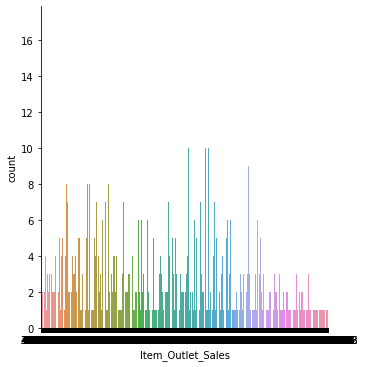

In [23]:
sns.catplot(x = 'Item_Outlet_Sales', data = df_train, kind = 'count' )

### Observation: 
### Here we can see that there are high "Item_Outlet_Sales" in the count range between 10 to 12.

In [24]:
correlation = df_train.corr()

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


<AxesSubplot:>

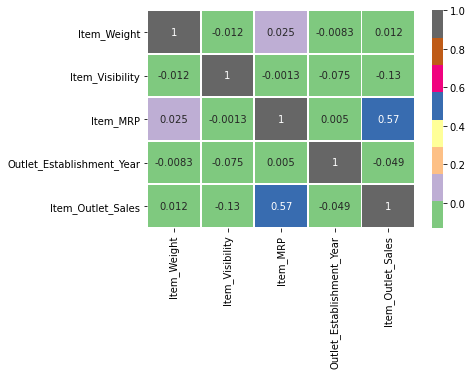

In [25]:
print(correlation)
sns.heatmap(correlation, cmap="Accent", annot=True, linewidth=0.7)

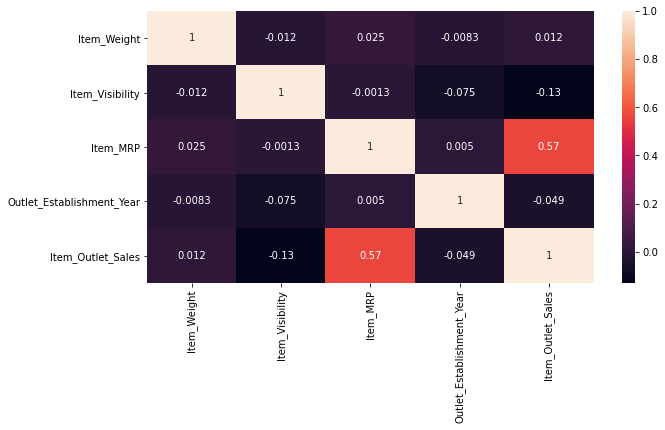

In [26]:
plt.figure(figsize =(10,5))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

### Observation: 
### Here we can see that the features are with individual importance and there is no high correlation between any of the features. So there is no need to drop any column further for the similar correlation and bad correlation with most of the features.

# Univariate Analysis:

In [27]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

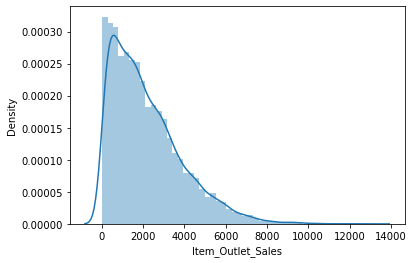

In [28]:
sns.distplot(df_train["Item_Outlet_Sales"])

### Observation: 
### Here we can see that there high distribution and more number of sales is around 2000. 

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

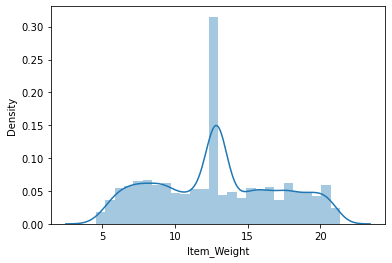

In [29]:
sns.distplot(df_train["Item_Weight"])

### Observation: 
### Here we can see that the maximum value is almost around 11 to 13.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

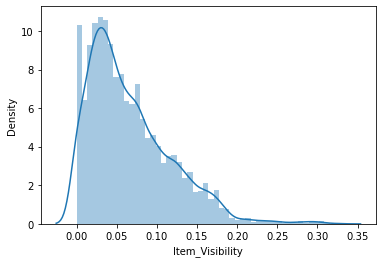

In [30]:
sns.distplot(df_train["Item_Visibility"])

### Observation: 
### Here we can see that there is skewness in the left side of the graph and there is high distribution is around 0.05 and the less distribution is around 0.20

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

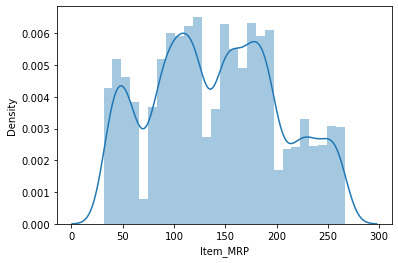

In [31]:
sns.distplot(df_train["Item_MRP"])

### Observation: 
### Here we can see that there is high distribution in between 100 to 200.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

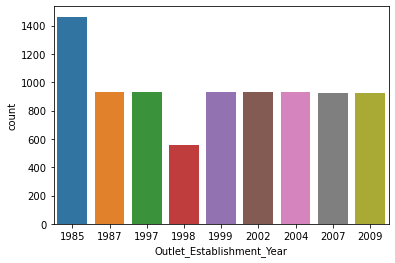

In [32]:
sns.countplot(df_train["Outlet_Establishment_Year"])

### Observation:
### Here we can see that there is high distribution in the year 1985 and in rest years there is almost similar distribution but it is very less distribution the year 1998.

### Categorical data Analysis:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

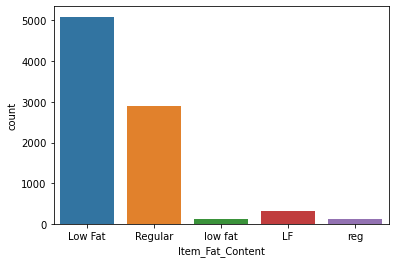

In [33]:
sns.countplot(df_train["Item_Fat_Content"])

### Observation: 
### Here we can see that there is high distribution in sales in "Low Fat" and there is very less distribution in "low fat" and we can observe that there is need to clean the data as the columns represent same but are mentioned in different manner.

<function matplotlib.pyplot.show(close=None, block=None)>

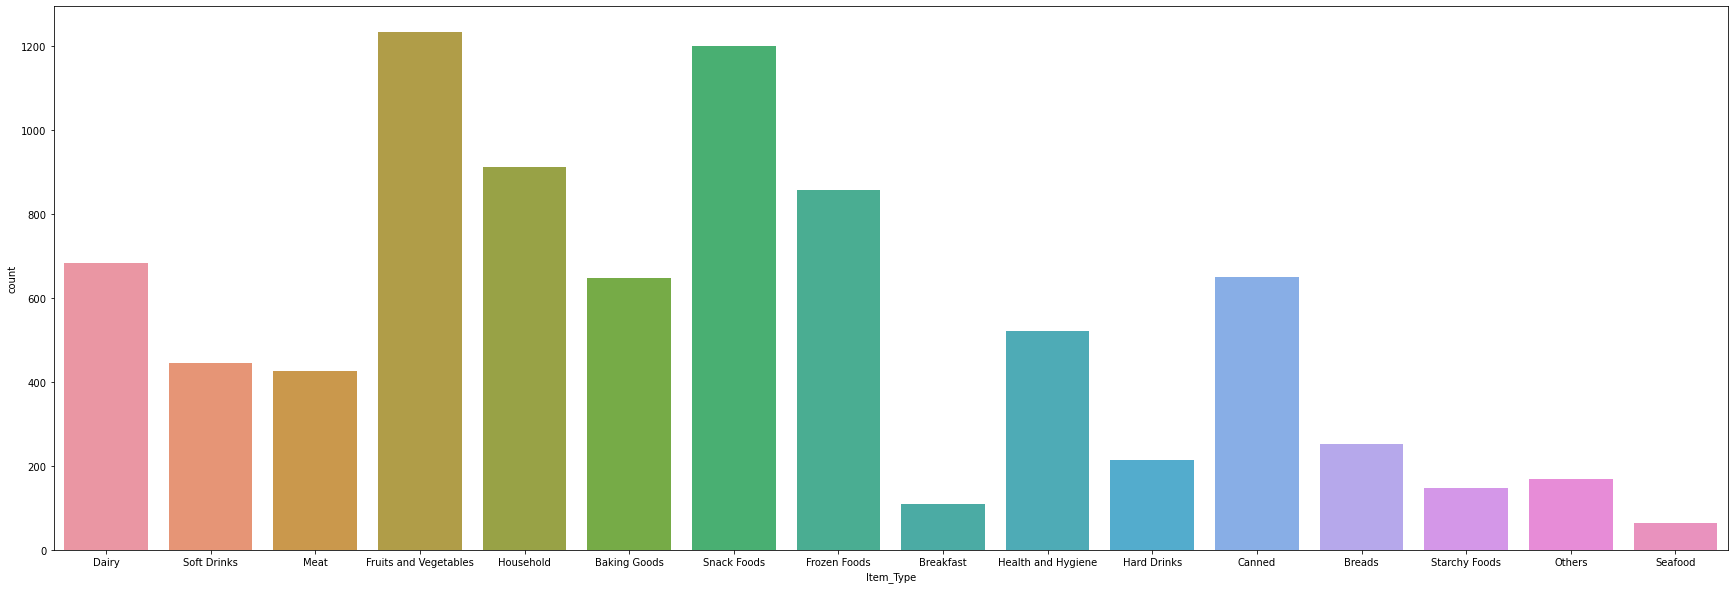

In [34]:
plt.figure(figsize = (30,10))
sns.countplot(x = "Item_Type", data = df_train)
plt.show

### Observation: 
### Here we can see that there is high distribution in "Fruits and Vegetables" and then its next high in "Snack Foods" and the least distribution is in "Sea food".

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

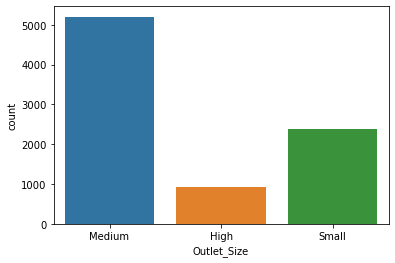

In [35]:
sns.countplot(df_train["Outlet_Size"])

### Observation:
### Here we can see that there is high distribution in "medium" and the least distribution in "high".

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

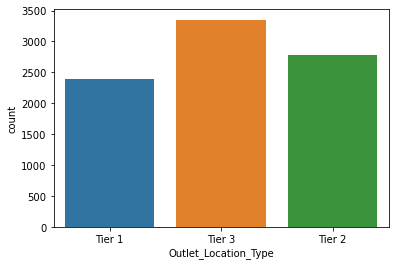

In [36]:
sns.countplot(df_train["Outlet_Location_Type"])

### Observation:
### Here we can see that there is high distribution in "Tier 3" and then the least in "Tier 1".

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

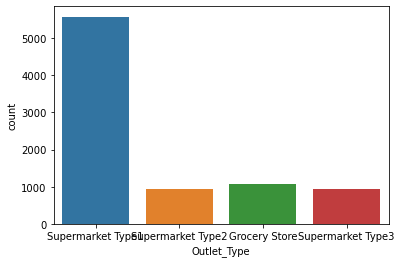

In [37]:
sns.countplot(df_train["Outlet_Type"])

### Observation:
### Here we can see that there is high distribution in "Supermarket" and the other are least distributed.

# Bivariate Analysis:

In [38]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

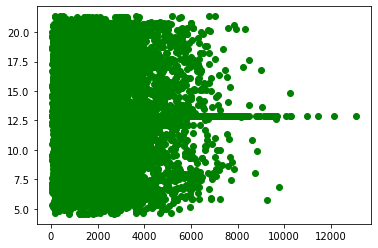

In [39]:
plt.scatter(x = 'Item_Outlet_Sales', y = 'Item_Weight', data = df_train,c='g')

### Observation: 
### Here we can see that there is high scattering points of sales between 2000 to 3000 and we can see that as the number of "Item_Outlet_Sales" increased the scattering weights decreased which we can at 10,000 to 12,000.

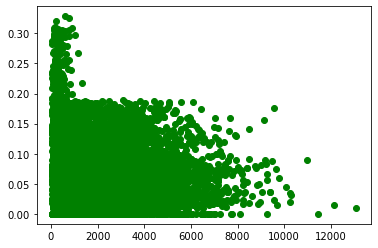

In [40]:
plt.scatter(x = 'Item_Outlet_Sales', y = 'Item_Visibility', data = df_train,c='g')

### Observation: 
### Here we can see that there is high distribution of sales around 2000 to 3000.

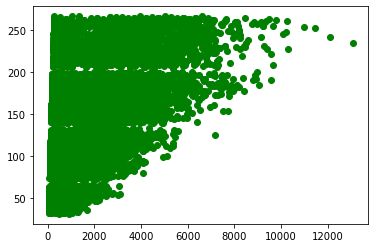

In [41]:
plt.scatter(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = df_train,c='g')

### Observation: 
### Here we can see that high distribution of sales is more in the product of MRP 200,250

In [42]:
# Handling the column "Item_fat" ,concating the similar resembling data:
df_train["Item_Fat_Content"].value_counts() 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
df_train.replace({"Item_Fat_Content": {"low fat": "Low Fat", "LF": "Low Fat", "reg": "Low Fat"}}, inplace = True)

In [44]:
df_train["Item_Fat_Content"].value_counts() 

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

### Observation:
### Here we can see that the value counts reduced and there are only two categories now.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

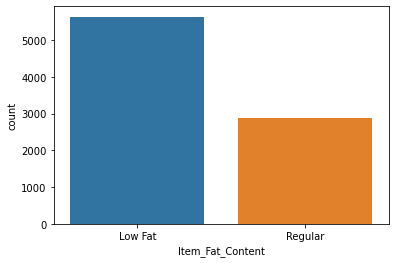

In [45]:
# Now let's visualize it after traeting:
sns.countplot(df_train["Item_Fat_Content"])

### Observation: 
### Thus we can say that we have successfully cleaned the data in this column and treated it.

# Data Preprocessing :

## Label Encoding:

#### Here we convert all the categorical values into numerical values.

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df_train["Item_Fat_Content"] = encoder.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"] = encoder.fit_transform(df_train["Item_Type"])
df_train["Outlet_Size"] = encoder.fit_transform(df_train["Outlet_Size"])
df_train["Outlet_Location_Type"] = encoder.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"] = encoder.fit_transform(df_train["Outlet_Type"])


In [48]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


### Observation:
### Here we can see that all the categorical columns are converted into numerical columns and there are no columns left with strings. 

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


### Observation:
### Here we can see that all are changed into "int" and "float" data types.

### Observation:
### Here we have done with the label encoding but there is problem of preference as the values are ascending ,so we also solve this problem with "onehot encoding".

In [50]:
df_test["Item_Fat_Content"] = encoder.fit_transform(df_test["Item_Fat_Content"])
df_test["Item_Type"] = encoder.fit_transform(df_test["Item_Type"])
df_test["Outlet_Size"] = encoder.fit_transform(df_test["Outlet_Size"])
df_test["Outlet_Location_Type"] = encoder.fit_transform(df_test["Outlet_Location_Type"])
df_test["Outlet_Type"] = encoder.fit_transform(df_test["Outlet_Type"])

In [51]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1


### Observation: 
### Here we can see that all the categorical columns are converted into numerical columns and there are no columns left with strings. 

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int32  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   int32  
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   int32  
 7   Outlet_Location_Type       5681 non-null   int32  
 8   Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(5), int64(1)
memory usage: 288.6 KB


### Observation:
### Here we can see that all are changed into "int" and "float" data types.

### Observation:
### Here we have done with the label encoding but there is problem of preference as the values are ascending ,so we also solve this problem with "onehot encoding".

# Detection of Outliers:

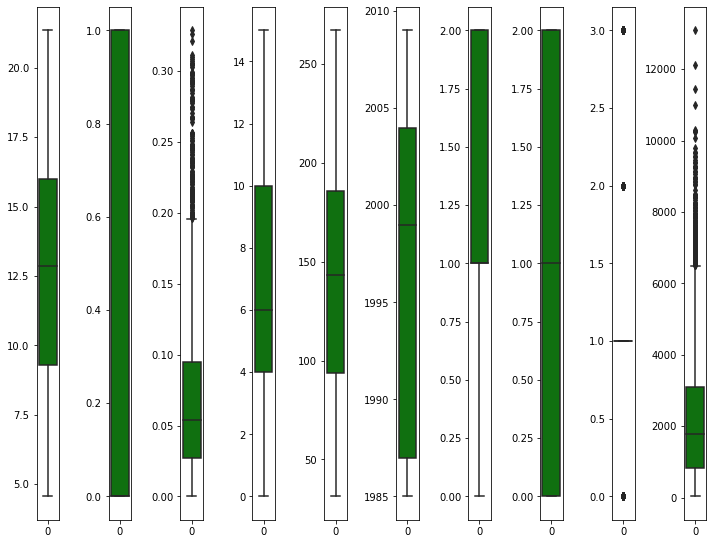

In [53]:
col_list = df_train.columns.values
ncol = 30
nrows = 12
plt.figure(figsize = (ncol,3*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = df_train[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

### Observation: 
### Here we can see that there are outliers present in 2nd and 5th columns which are: "Item visibility" and "Outlet_Establishment_Year".

# Treating/Removing Outliers:

Method - 1: Z-Score method

In [54]:
feature = df_train[['Item_Visibility']]

In [55]:
import scipy as stats

from scipy.stats import zscore

In [56]:
z=np.abs(zscore(feature))

df_train_new = df_train[(z<3).all(axis = 1)]

In [57]:
df_train_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [58]:
print(df_train.shape)

(8523, 10)


In [59]:
print(df_train_new.shape)

(8428, 10)


Method - 2: IQR Method:

In [60]:
# Inter Quantile Method:

Q1 = feature.quantile(0.25)  # 1st quantile
Q3 = feature.quantile(0.75)  # 3rd quantile
IQR = Q3-Q1
data_removed = df_train[~((df_train <(Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [61]:
df_train.shape

(8523, 10)

In [62]:
data_removed.shape

(8379, 10)

### Observation:
### Here we can see that there are no changes even after treating the Outliers that means the outliers are unaffective.

# Checking for skewness:

In [63]:
df_train.shape

(8523, 10)

In [64]:
data_removed.skew()

Item_Weight                  0.089860
Item_Fat_Content             0.685692
Item_Visibility              0.738153
Item_Type                    0.100850
Item_MRP                     0.129015
Outlet_Establishment_Year   -0.414811
Outlet_Size                 -0.081516
Outlet_Location_Type        -0.214017
Outlet_Type                  0.958609
Item_Outlet_Sales            1.170947
dtype: float64

In [65]:
data_removed.skew().sort_values()

Outlet_Establishment_Year   -0.414811
Outlet_Location_Type        -0.214017
Outlet_Size                 -0.081516
Item_Weight                  0.089860
Item_Type                    0.100850
Item_MRP                     0.129015
Item_Fat_Content             0.685692
Item_Visibility              0.738153
Outlet_Type                  0.958609
Item_Outlet_Sales            1.170947
dtype: float64

### Observation:
### Here we can see that there are number of positively skewed data for the columns but concentrating on correlation we have to treat the skewnesss of "Item_Visibility" and "Outlet_Establishment_Year".

In [66]:
data_removed['Item_Visibility'] = np.sqrt(data_removed['Item_Visibility'])

In [67]:
data_removed.skew()

Item_Weight                  0.089860
Item_Fat_Content             0.685692
Item_Visibility             -0.279510
Item_Type                    0.100850
Item_MRP                     0.129015
Outlet_Establishment_Year   -0.414811
Outlet_Size                 -0.081516
Outlet_Location_Type        -0.214017
Outlet_Type                  0.958609
Item_Outlet_Sales            1.170947
dtype: float64

### Observation:
### Here we can see that there is change in skewness in "Item_Visibility" and in decreased from '0.738' to ' -0.27'

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

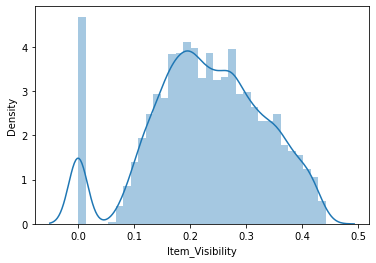

In [68]:
sns.distplot(data_removed["Item_Visibility"])

### Observation: 
### Here we can see that there is somewhat normal distribution and skewness is somewhat handled.

#### As there is no change in the skewness value in the column "Outlet_Establishment_Year" so there is no need to present visualization.

# Training Phase:

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
x = data_removed.drop("Item_Outlet_Sales", axis=1)
y = data_removed["Item_Outlet_Sales"]

In [71]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5282358035349465  on Random_state  32


### Observation:
### Here we can see that the Maximum r2 score is  0.5796746514099128  on Random_state  32

# splitting the data at the "maxRs" = 32:

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Observation:
### Here I have given 70% for the training and 30% for testing.

# Regression Algorithms:

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [74]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.5282358035349465


### Observation: 
### The R2 Score in Linear Regression is 57%

In [75]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

885.4956152355339
1397418.1405417295
1182.1244183848542


# Random Forest Regressor:

In [76]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.5768294490311799


In [77]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

788.6251102307081
1253478.345533312
1119.5884715078626


### Observation: 
### The R2 Score in Linear Regression is 57%

# KNN Regressor:

In [78]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.44511821697736376


In [79]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))


926.6625057279236
1643621.6975813056
1282.0381030146123


# Observation: 
### The R2 Score in Linear Regression is 38%

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gbdt=GradientBoostingRegressor(random_state=0)
gbdt.fit(x_train,y_train)

#prediction
predgbdt=gbdt.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predgbdt))

R2_Score: 0.6158121936292944


In [82]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predgbdt))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predgbdt))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predgbdt)))

751.538547869009
1138007.1103745296
1066.7741609049826


### Observation: 
### The R2 Score in Linear Regression is 61%

In [83]:
from sklearn.ensemble import AdaBoostRegressor

In [84]:
ada=AdaBoostRegressor(random_state=0)
ada.fit(x_train,y_train)

#prediction
predada=ada.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predada))

R2_Score: 0.5526482844986258


In [85]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predada))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predada))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predada)))


877.4275720811596
1325105.6505098538
1151.1323340562778


### Observation:
### The R2 Score in Linear Regression is 54%

# Checking the cross validation score:

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.5017402022980018


In [88]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.5427480447999065


In [89]:
# Checking cv score for Gradient Boost Regression
print(cross_val_score(gbdt,x,y,cv=5).mean())

0.5847896441998408


In [90]:
# Checking cv score for Ada Boost Regressor
print(cross_val_score(ada,x,y,cv=5).mean())

0.4417586682023865


# Regularization:

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [92]:
# Gradient Boost Regression:
parameters = {'n_estimators':[0,25],'max_depth':[5,7,9,10,12]}
grid=GridSearchCV(gbdt,parameters,scoring='r2',cv=10)

In [93]:
grid_result = grid.fit(x_train,y_train)

In [94]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 25}

In [95]:
grid_result.score(x_train,y_train)

0.6052144705518321

In [96]:
y_preds_gbdt=grid_result.predict(x_test)
rmse_gbdt=np.sqrt(mean_squared_error(y_preds_gbdt,y_test))
print('RMSE for Gradient Boosting Regression :{0:.2f}'.format(rmse_gbdt))

RMSE for Gradient Boosting Regression :1078.09


In [97]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state' :list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [98]:
# Final model training:
ls = Lasso(alpha = 0.1, random_state = 0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

49.25068914787012

In [99]:
y_preds_gbdt=grid_result.predict(df_test)
df_gbdt_submission=df_test
df_gbdt_submission['Item_Outlet_Sales']=y_preds_gbdt
df_gbdt_submission

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1,1739.101009
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1,1467.193048
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0,700.013123
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1,2437.210744
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3,5794.283342
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1,2165.754957
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2,2515.853235
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1,1871.457911
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1,3416.313265
